In [1]:
import pandas as pd
import seaborn as sns 
import warnings                                                ### BASE MODEL ----
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\SHAIKH MD KASHIF\\Downloads\\Default_Fin.csv")   ## Reading the csv File 

In [3]:
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
data.drop(columns="Index",inplace=True)         ## Drop the Unwanted Columns  

In [5]:
data.head(10)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
5,0,11035.08,89898.72,0
6,1,9906.12,298862.76,0
7,0,9704.04,211205.40,0
8,1,13932.72,449622.36,0
9,1,0.00,351303.24,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [7]:
data.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [8]:
data.corr()

,Employed,Bank Balance,Annual Salary,Defaulted?
Employed,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.035420,0.350119,-0.019871,1.000000


In [9]:
data.isnull().sum()                         ## Finding the Null Values

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

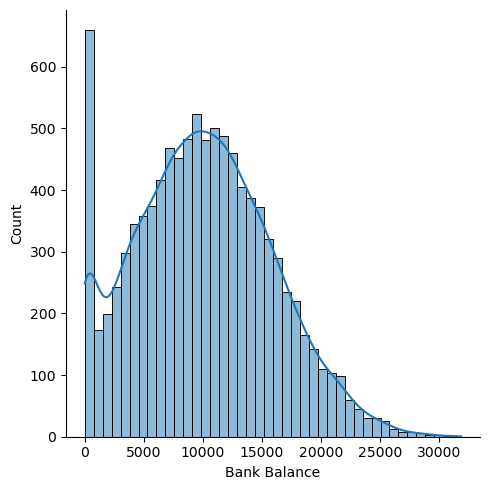

In [10]:
sns.displot(data["Bank Balance"],kde=True)
plt.show()

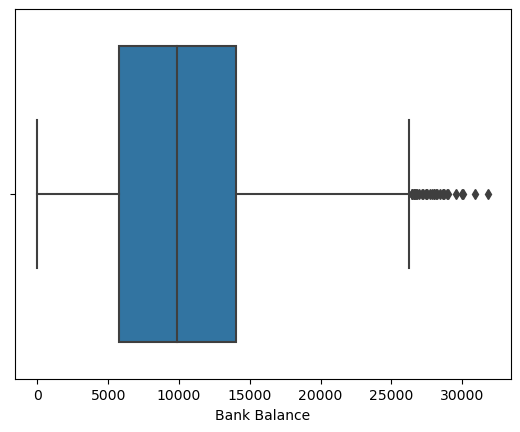

In [11]:
sns.boxplot(data["Bank Balance"])
plt.show()

In [12]:
data[data["Bank Balance"]>25000]

,Employed,Bank Balance,Annual Salary,Defaulted?
173,0,26469.60,171257.88,1
933,1,25356.24,416973.12,0
1136,1,29988.24,618051.48,1
1160,0,30032.16,179370.24,1
1255,0,25480.44,286037.52,1
...,...,...,...,...
9654,1,25545.60,505158.00,1
9873,1,28692.12,603634.92,0
9893,1,27460.92,624522.84,1
9912,1,25786.80,531719.04,1


In [13]:
data[data["Bank Balance"]>30000]

,Employed,Bank Balance,Annual Salary,Defaulted?
1160,0,30032.16,179370.24,1
7815,0,30941.64,308479.80,1
8495,0,31851.84,263164.68,1


In [14]:
data[(data["Bank Balance"]>25000) & (data["Employed"]==1)].head()    ## Accepting the Outliers Case after Research......

,Employed,Bank Balance,Annual Salary,Defaulted?
933,1,25356.24,416973.12,0
1136,1,29988.24,618051.48,1
1359,1,26651.64,488701.20,1
2448,1,25601.52,338854.56,1
2889,1,25027.08,427886.76,1


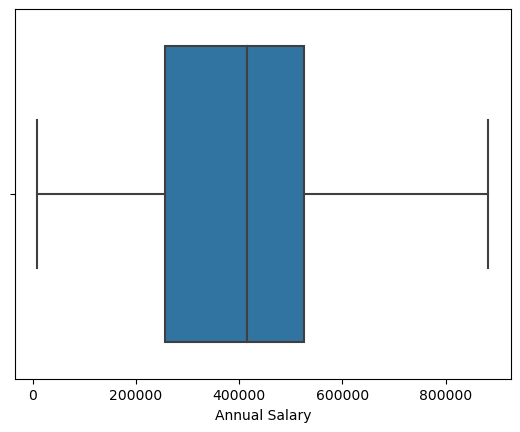

In [15]:
sns.boxplot(data["Annual Salary"])
plt.show()            

In [16]:
data["Bank Balance"].skew()

0.24606472368032986

In [17]:
data["Annual Salary"].skew()

0.07334073752483013

In [18]:
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [19]:
x=data.drop(columns="Defaulted?")         ## Initializing the X and Y----
x

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00
...,...,...,...
9995,1,8538.72,635908.56
9996,1,9095.52,235928.64
9997,1,10144.92,703633.92
9998,1,18828.12,440029.32


In [20]:
y=data["Defaulted?"]
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64

# Machine Learning -

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Machine Learning Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [24]:
LogisticRegressionPipeline=Pipeline([("Logistic_Classifier",LogisticRegression())])
DecisionTreePipeline=Pipeline([("Decision_Tree",DecisionTreeClassifier())])
RandomForestPipeline=Pipeline([("RandomForest",RandomForestClassifier())])
XGBClassifierPipeline=Pipeline([("XGB",XGBClassifier())])
KNeighborsClassiferPipeline=Pipeline([("KNN",KNeighborsClassifier())])
AdaBoostClassifierPipeline=Pipeline([("ADA",AdaBoostClassifier())])
SVCClassifierPipeline=Pipeline([("SVC",SVC())])

In [25]:
mypipeline=[LogisticRegressionPipeline,DecisionTreePipeline,RandomForestPipeline,XGBClassifierPipeline,KNeighborsClassiferPipeline,AdaBoostClassifierPipeline,SVCClassifierPipeline]

In [26]:
for model in mypipeline:
    model.fit(x_train,y_train)

In [27]:
accuracy=0.0
CV=0
classifier=0
pipeline=""

In [28]:
PipelineDict={0:"Logistic Regression",1:"Decision Tree",2:"Random Forest",3:"XGBClassifier",4:"KNeighborsClassifier",5:"AdaBoostClassifier",6:"SVC"}

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
mypipeline

[Pipeline(steps=[('Logistic_Classifier', LogisticRegression())]),
 Pipeline(steps=[('Decision_Tree', DecisionTreeClassifier())]),
 Pipeline(steps=[('RandomForest', RandomForestClassifier())]),
 Pipeline(steps=[('XGB',
                  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=0, gpu_id=-1,
                                grow_policy='depthwise', importance_type=None,
                                interaction_constraints='',
                                learning_rate=0.300000012, max_bin=256,
                                max_cat_threshold=64, max_cat_to_onehot=4,
                                max_delta_step=0, max_depth=6, max_leaves=0,
                                min_

In [31]:
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy:{}".format(PipelineDict[i],model.score(x_test,y_test)))
    print("{} Train Accuracy:{}".format(PipelineDict[i],model.score(x_train,y_train)))

Logistic Regression Test Accuracy:0.97
Logistic Regression Train Accuracy:0.9745
Decision Tree Test Accuracy:0.956
Decision Tree Train Accuracy:1.0
Random Forest Test Accuracy:0.966
Random Forest Train Accuracy:1.0
XGBClassifier Test Accuracy:0.967
XGBClassifier Train Accuracy:0.988125
KNeighborsClassifier Test Accuracy:0.964
KNeighborsClassifier Train Accuracy:0.975625
AdaBoostClassifier Test Accuracy:0.969
AdaBoostClassifier Train Accuracy:0.97525
SVC Test Accuracy:0.968
SVC Train Accuracy:0.97325


In [32]:
for i,model in enumerate(mypipeline):
    if model.score(x_test,y_test)>accuracy:
        accuracy=model.score(x_test,y_test)
        pipeline=model
        classifier=i
print("Classifier with best:{}".format(PipelineDict[classifier]))

Classifier with best:Logistic Regression


In [33]:
score=cross_val_score(LogisticRegression(),x,y,cv=5)
print(score)
score.mean()

[0.967  0.967  0.9665 0.9655 0.966 ]


0.9663999999999999

>BY CHECKING EVERY EACH CONDITION(ALGORITHIMS) WE CAME TO CONCLUSION THE BEST ACURACY IS GIVEN BY LOG REGRESSION WITH A BEST CV
>BY CARRYING ALONG 2ND BEST BY ADA BOOST CLASSIFIER

In [34]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print("Train:",model.score(x_test,y_test))
print("Test:",model.score(x_train,y_train))
score=cross_val_score(model,x,y,cv=5)
print(score)
score.mean()

Train: 0.97
Test: 0.9745
[0.967  0.967  0.9665 0.9655 0.966 ]


0.9663999999999999

Saving the Model

In [35]:
from joblib import dump
dump(model,"loan_default.joblib")

['loan_default.joblib']

In [37]:
from joblib import load
loadmodel=load("loan_default.joblib")    ### Prediction---
loadmodel.predict([[1,2500,0]])

array([1], dtype=int64)

>THE END-